<h3> O objetivo do desafio é identificar quais máquinas apresentam potencial de falha tendo como base dados extraídos através de sensores durante o processo de manufatura.  Para isso são fornecidos dois datasets: um dataset chamado <i>desafio_manutencao_preditiva_treino</i> composto por 6667 linhas, 9 colunas de informação (<i>features</i>) e a variável a ser prevista (“<i>failure_type”</i>). </h3>

<h4>Importaremos alguns módulos para visualizar e analisar os dados</h4>

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sns.set_style("darkgrid")

In [87]:
data_treino = pd.read_csv("./data/desafio_manutencao_preditiva_treino.csv")
data_teste = pd.read_csv("./data/desafio_manutencao_preditiva_teste.csv")

TypeError: read_csv() got an unexpected keyword argument 'drop'

In [59]:
data_teste.drop("product_id", axis=1, inplace=True)
data_treino.drop("product_id", axis=1, inplace=True)

In [81]:
data_teste.head()

,id,tipo,temp_ar_kelvin,temp_processo_kelvin,velocidade_rotacao_rpm,torque_nm,desgaste_ferramenta_min
0,446,1,297.5,308.6,1793,26.7,70
1,7076,1,300.7,310.5,1536,47.4,192
2,1191,1,297.2,308.4,1460,42.1,41
3,2618,1,299.4,309.1,1670,35.9,68
4,5067,1,304.1,313.1,1550,30.9,9


<h4>Renomearemos as variáveis para facilitar o entendimento</h4>

In [61]:
rename_columns = {
    "udi": "id",
    "type": "tipo",
    "air_temperature_k": "temp_ar_kelvin",
    "process_temperature_k": "temp_processo_kelvin",
    "rotational_speed_rpm": "velocidade_rotacao_rpm",
    "torque_nm": "torque_nm",
    "tool_wear_min": "desgaste_ferramenta_min",
    "failure_type": "tipo_falha",
}

data_treino.rename(columns=rename_columns, inplace=True)
data_teste.rename(columns=rename_columns, inplace=True)

In [62]:
data_treino.head()

,id,tipo,temp_ar_kelvin,temp_processo_kelvin,velocidade_rotacao_rpm,torque_nm,desgaste_ferramenta_min,tipo_falha
0,1,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L,298.1,308.6,1558,42.4,14,No Failure


In [63]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6667 non-null   int64  
 1   tipo                     6667 non-null   object 
 2   temp_ar_kelvin           6667 non-null   float64
 3   temp_processo_kelvin     6667 non-null   float64
 4   velocidade_rotacao_rpm   6667 non-null   int64  
 5   torque_nm                6667 non-null   float64
 6   desgaste_ferramenta_min  6667 non-null   int64  
 7   tipo_falha               6667 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 416.8+ KB


<h4>A função a seguir tranforma as colunas categóricas em numéricas. O nosso conjunto de dados possui 3 variáveis categóricas, são elas: <i>product_id, type e failure_type</i></h4>

In [80]:
def Encoder(feature, df):
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])


cat_columns = ["tipo_falha", "tipo"]
for feature in cat_columns:
    Encoder(feature, data_treino)
for feature in cat_columns:
    Encoder("tipo", data_teste)

In [65]:
data_treino.head()

,id,tipo,temp_ar_kelvin,temp_processo_kelvin,velocidade_rotacao_rpm,torque_nm,desgaste_ferramenta_min,tipo_falha
0,1,2,298.1,308.6,1551,42.8,0,1
1,2,1,298.2,308.7,1408,46.3,3,1
2,5,1,298.2,308.7,1408,40.0,9,1
3,6,2,298.1,308.6,1425,41.9,11,1
4,7,1,298.1,308.6,1558,42.4,14,1


<h4>Correlação dos atributos do conjunto de dados</h4>

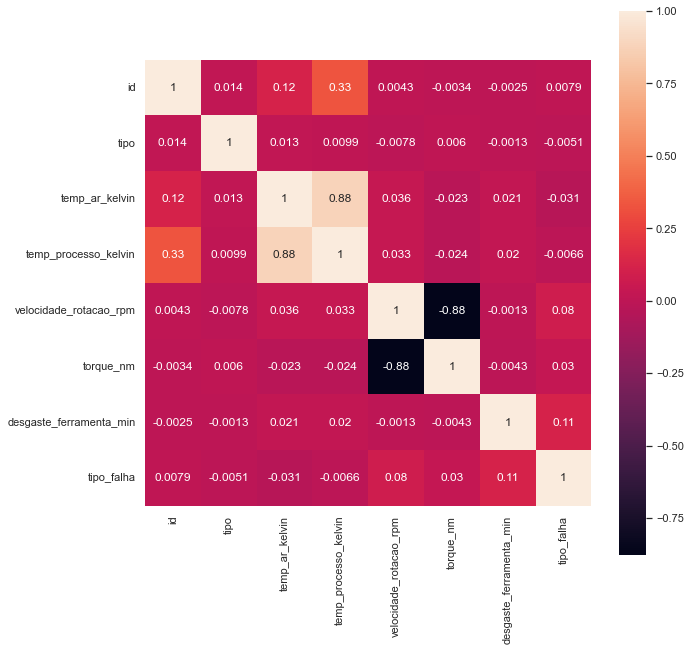

In [66]:
sns.heatmap(data_treino.corr(), annot=True, square=True, cmap="rocket")
sns.set(rc={"figure.figsize": (10, 10)})
plt.show()

<h4>Alguns dados descritivos: média, desvio padrão, quartis, valores mínimos e máximos.</h4>

In [67]:
data_treino.describe()

,id,tipo,temp_ar_kelvin,temp_processo_kelvin,velocidade_rotacao_rpm,torque_nm,desgaste_ferramenta_min,tipo_falha
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,1.199340,299.992515,309.992620,1537.419529,40.058512,108.098095,1.038848
std,2896.125718,0.597534,1.994710,1.488101,177.182908,9.950804,63.359915,0.378887
min,1.000000,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2496.500000,1.000000,298.300000,308.800000,1422.500000,33.200000,54.000000,1.000000
50%,4983.000000,1.000000,300.000000,310.000000,1503.000000,40.200000,108.000000,1.000000
75%,7510.500000,2.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,1.000000
max,10000.000000,2.000000,304.500000,313.800000,2886.000000,76.600000,251.000000,5.000000


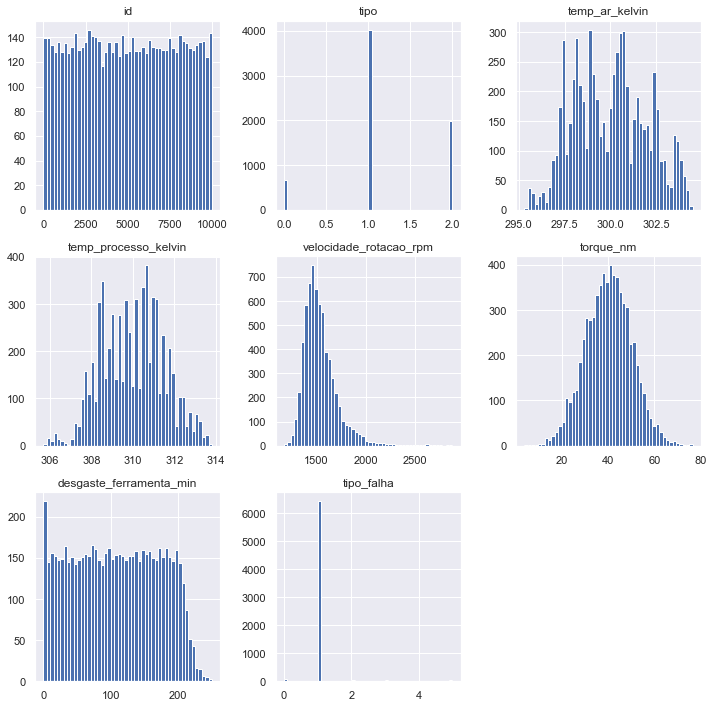

In [68]:
data_treino.hist(bins=50)
plt.tight_layout()
plt.show()

<h4>Analisaremos a relação de <i>tipo_falha</i> com as variáveis numéricas utilizando gráfico de dispersão</h4>

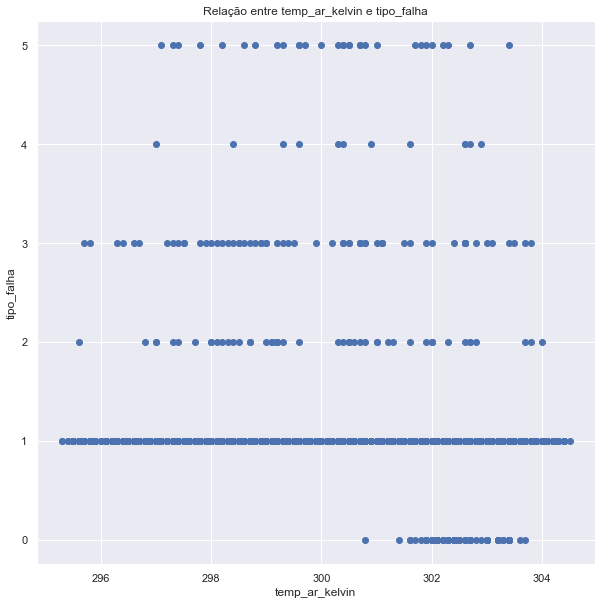

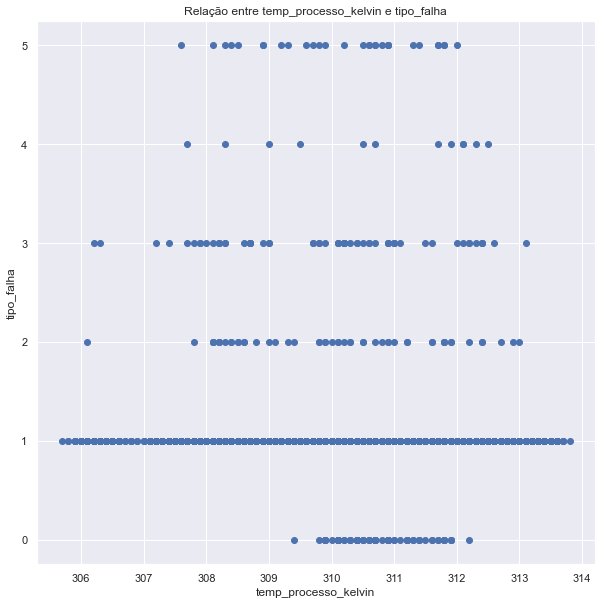

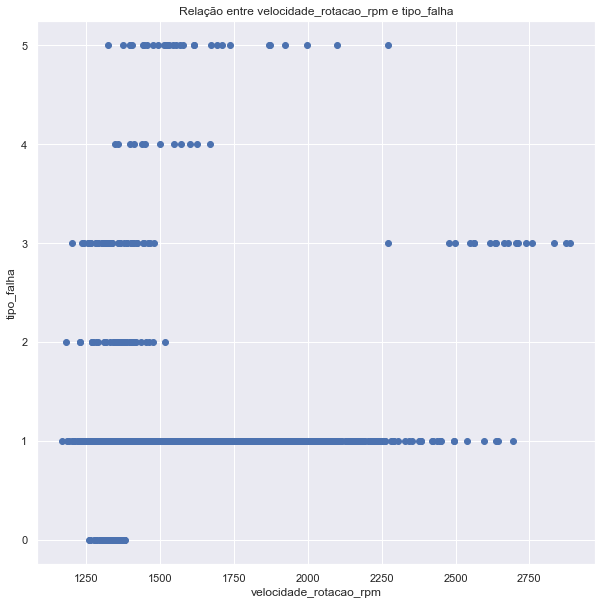

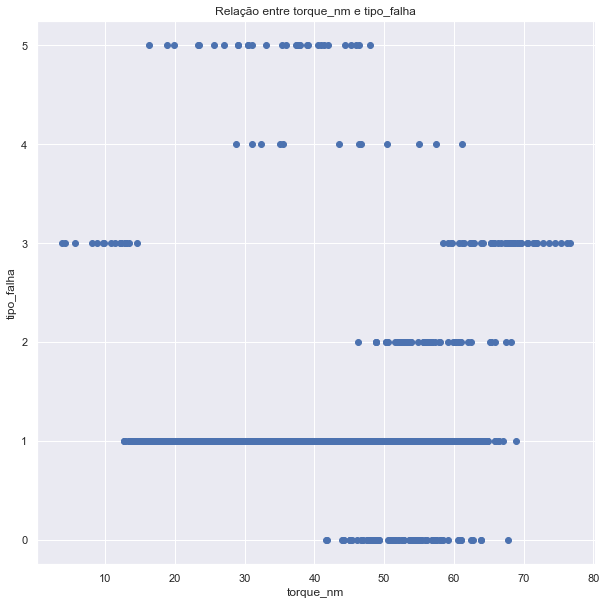

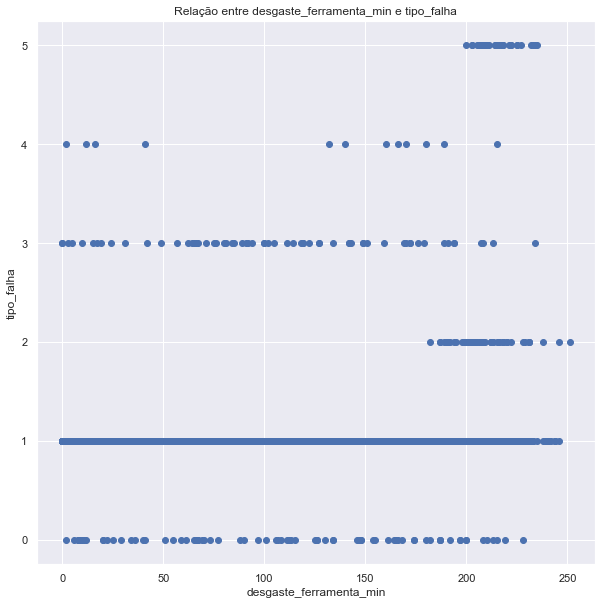

In [41]:
num_vars = [
    "temp_ar_kelvin",
    "temp_processo_kelvin",
    "velocidade_rotacao_rpm",
    "torque_nm",
    "desgaste_ferramenta_min",
]

for var in num_vars:
    plt.scatter(data_treino[var], data_treino["tipo_falha"])
    plt.title(f"Relação entre {var} e tipo_falha")
    plt.xlabel(var)
    plt.ylabel("tipo_falha")

    plt.show()

<h3>Estamos trabalhando com um problema <b>supervisionado</b> de classificação. Alguns algoritmos como Regressão Logística ou Random Forests seriam ideais para a solução.</h3>

<h4>Para melhor trabalhar com o dataset, as colunas foram renomeadas e o encoding das variáveis tipo e tipo_falha foi feito</h4>

Utilizaremos o algoritmo Árvore de Decisão pois foi o que apresentou melhor perfomance do dataset.

A acurácia foi utilizada pois a distribuição das classes no dataset é equilibrada e não há problemas graves de classificação desbalanceada, dessa forma funcionando como uma boa métrica de avaliação.

In [76]:
X = data_treino.drop("tipo_falha", axis=1)
y = data_treino["tipo_falha"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

Acurácia do modelo: 97.23%


Após treinamento, prediremos os valores com base no conjunto de dados de teste.

In [83]:
data_teste

,id,tipo,temp_ar_kelvin,temp_processo_kelvin,velocidade_rotacao_rpm,torque_nm,desgaste_ferramenta_min
0,446,1,297.5,308.6,1793,26.7,70
1,7076,1,300.7,310.5,1536,47.4,192
2,1191,1,297.2,308.4,1460,42.1,41
3,2618,1,299.4,309.1,1670,35.9,68
4,5067,1,304.1,313.1,1550,30.9,9
...,...,...,...,...,...,...,...
3328,5554,1,302.5,311.9,1306,59.7,172
3329,6961,1,300.7,311.0,1413,52.0,91
3330,6914,1,300.8,311.2,1481,38.5,181
3331,5510,1,302.8,312.2,1509,36.5,52


In [82]:
predictions = model.predict(data_teste)

In [86]:
output = pd.DataFrame(
    {
        "id": data_teste.id,
        "tipo": data_teste.tipo,
        "temp_ar_kelvin": data_teste.temp_ar_kelvin,
        "temp_processo_kelvin": data_teste.temp_processo_kelvin,
        "velocidade_rotacao_rpm": data_teste.velocidade_rotacao_rpm,
        "torque_nm": data_teste.torque_nm,
        "velocidade_rotacao_rpm": data_teste.velocidade_rotacao_rpm,
        "tipo_falha": predictions,
    }
)
output.to_csv("./data/predicted.csv", index=False)